In [2]:
import os
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request
import matplotlib.pyplot as plt
import numpy as np

In [3]:
os.getcwd()

'c:\\Users\\jacks\\Documents\\Python Scripts\\hands-on-ml\\2_end_to_end_project'

# Load Data

In [4]:
def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()

# Initial Exploration

In [5]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<AxesSubplot: title={'center': 'longitude'}>,
        <AxesSubplot: title={'center': 'latitude'}>,
        <AxesSubplot: title={'center': 'housing_median_age'}>],
       [<AxesSubplot: title={'center': 'total_rooms'}>,
        <AxesSubplot: title={'center': 'total_bedrooms'}>,
        <AxesSubplot: title={'center': 'population'}>],
       [<AxesSubplot: title={'center': 'households'}>,
        <AxesSubplot: title={'center': 'median_income'}>,
        <AxesSubplot: title={'center': 'median_house_value'}>]],
      dtype=object)

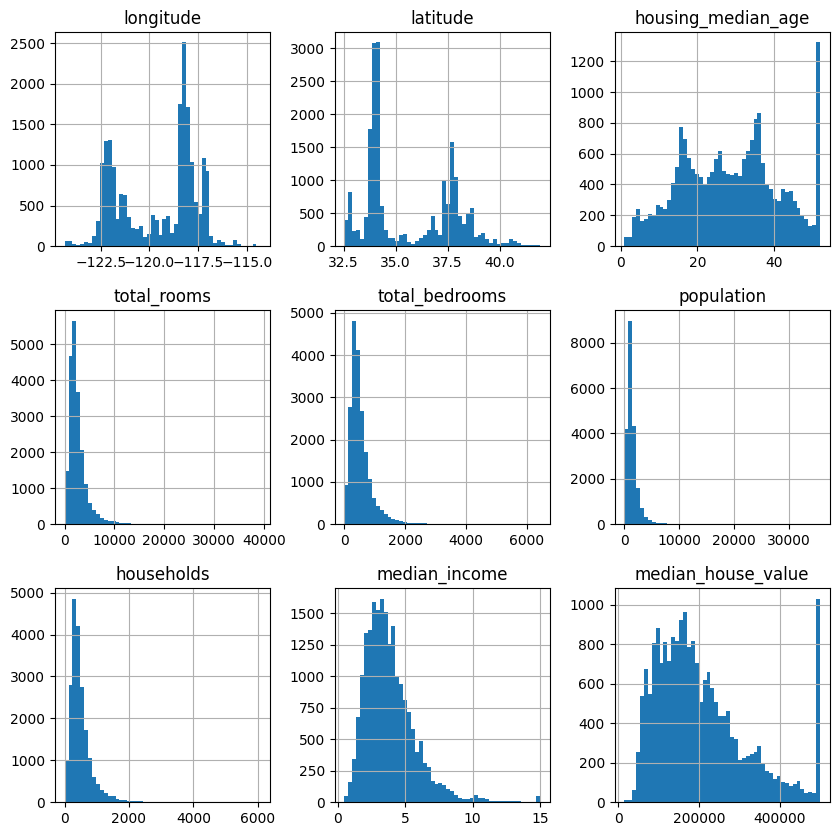

In [8]:

housing.hist(bins=50, figsize=(10, 10))

# Test Set Creation
Stratified sampling based on median income for representative test set.

In [9]:
# limit number of categories bei ceiling and dividing by 1.5
housing['income_cat'] = np.ceil(housing['median_income'] / 1.5)
# categories that are > 5 are merged to 5, as histogram shows a long tail for higher income households
housing['income_cat'].where(housing['income_cat'] < 5, 5.0, inplace=True)

<AxesSubplot: >

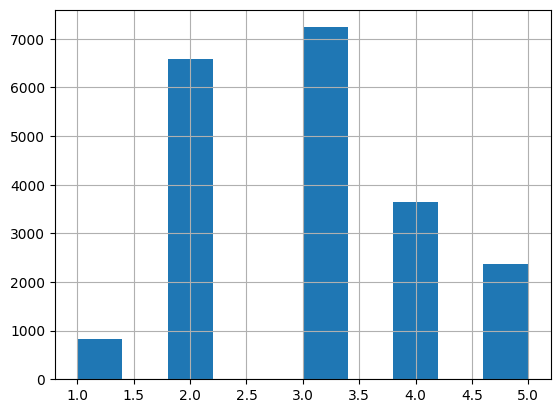

In [10]:
housing['income_cat'].hist()

In [11]:
from sklearn.model_selection import StratifiedShuffleSplit

In [12]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_idx, test_idx in split.split(housing, housing['income_cat']):
    strat_train = housing.loc[train_idx]
    strat_test = housing.loc[test_idx]

In [13]:
# check ratios of test and train set
print("Training set ratios: ")
print(strat_train['income_cat'].value_counts() / len(strat_train))

print("\nTest set ratios: ")
print(strat_test['income_cat'].value_counts() / len(strat_test))

Training set ratios: 
3.0    0.350594
2.0    0.318859
4.0    0.176296
5.0    0.114462
1.0    0.039789
Name: income_cat, dtype: float64

Test set ratios: 
3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114341
1.0    0.039971
Name: income_cat, dtype: float64


In [14]:
strat_test.drop(columns='income_cat', inplace=True, axis=1)
strat_train.drop(columns='income_cat', inplace=True, axis=1)

# work further only with train set
housing = strat_train.copy()

# Visualizations and Statistics

<AxesSubplot: xlabel='longitude', ylabel='latitude'>

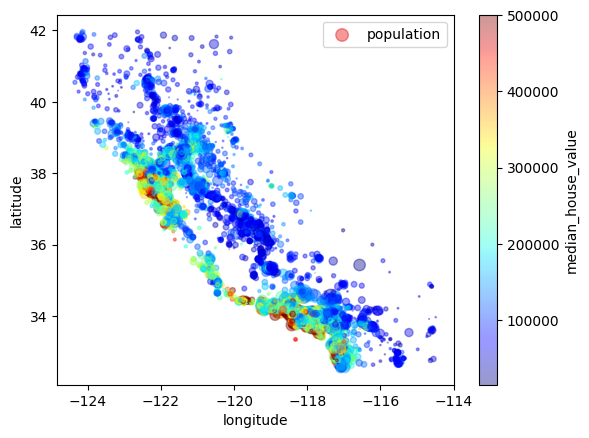

In [15]:
# geogrephical data: radius -> population, color -> median value
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, c='median_house_value',
 s=housing['population']/100, cmap=plt.get_cmap('jet'), label='population')

In [16]:
housing.corr()['median_house_value'].sort_values(ascending=False)

C:\Users\jacks\AppData\Local\Temp\ipykernel_12220\1376027442.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  housing.corr()['median_house_value'].sort_values(ascending=False)


median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64

array([[<AxesSubplot: xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot: xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot: xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot: xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot: xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot: xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot: xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot: xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot: xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot: xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot: xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot: xlabel

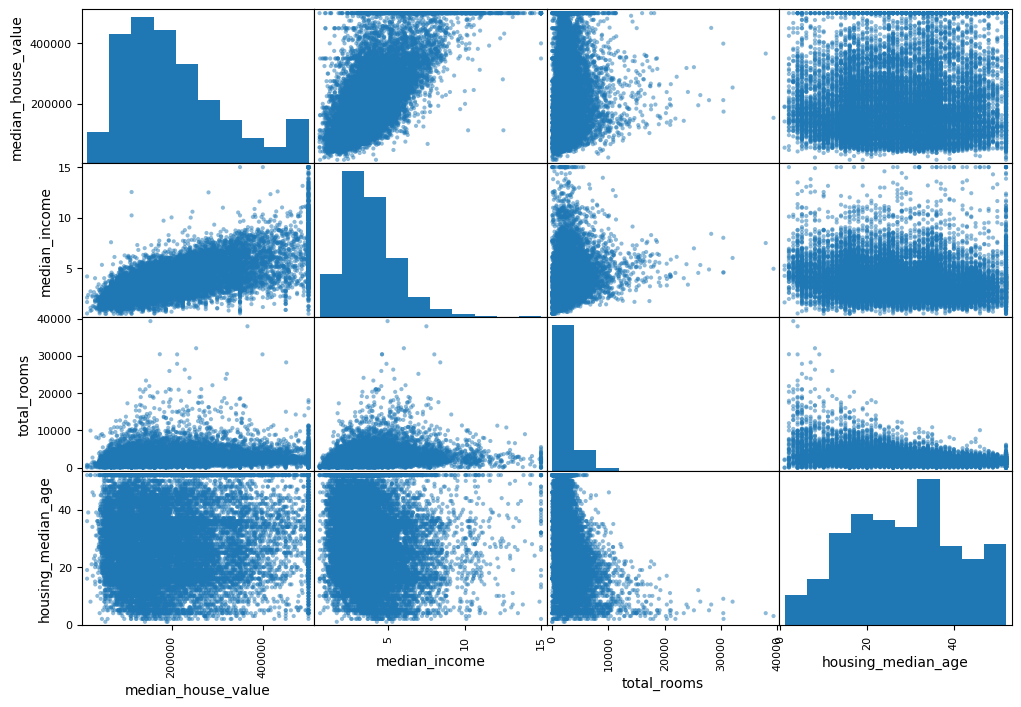

In [17]:
from pandas.plotting import scatter_matrix

# plot scatter for attributes with high correlation
attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(housing[attributes], figsize=(12, 8))

<AxesSubplot: xlabel='median_income', ylabel='median_house_value'>

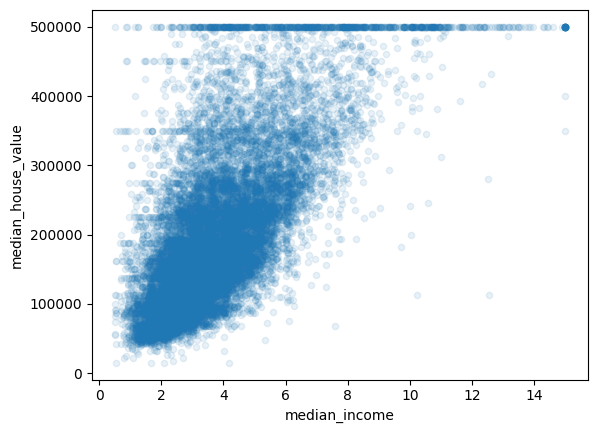

In [18]:
# plot scatter for median income and median value
housing.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.1)

# Feature engineering

In [19]:
# try out various combinations
housing['rooms_per_house'] = housing['total_rooms'] / housing['households']
housing['bedrooms_ratio'] = housing['total_bedrooms'] / housing['total_rooms']
housing['people_per_house'] = housing['population'] / housing['households']

In [20]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

C:\Users\jacks\AppData\Local\Temp\ipykernel_12220\2905470689.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


median_house_value    1.000000
median_income         0.688380
rooms_per_house       0.143663
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
people_per_house     -0.038224
longitude            -0.050859
latitude             -0.139584
bedrooms_ratio       -0.256397
Name: median_house_value, dtype: float64

# Data Cleaning
## Missing values

In [21]:
housing = strat_train.drop("median_house_value", axis=1)
housing_labels = strat_train["median_house_value"].copy()

In [22]:
null_rows_idx = housing.isnull().any(axis=1)
housing.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
14452,-120.67,40.50,15.0,5343.0,NaN,2503.0,902.0,3.5962,INLAND
18217,-117.96,34.03,35.0,2093.0,NaN,1755.0,403.0,3.4115,<1H OCEAN
11889,-118.05,34.04,33.0,1348.0,NaN,1098.0,257.0,4.2917,<1H OCEAN
20325,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,<1H OCEAN
14360,-117.87,33.62,8.0,1266.0,NaN,375.0,183.0,9.8020,<1H OCEAN


In [25]:
# drop rows with missing value
housing_option1 = housing.copy()

housing_option1.dropna(subset=["total_bedrooms"], inplace=True)  # option 1

# should be empty
housing_option1.loc[null_rows_idx]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


In [26]:
# drop column
housing_option2 = housing.copy()

housing_option2.drop("total_bedrooms", axis=1, inplace=True)  # option 2

housing_option2.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
14452,-120.67,40.50,15.0,5343.0,2503.0,902.0,3.5962,INLAND
18217,-117.96,34.03,35.0,2093.0,1755.0,403.0,3.4115,<1H OCEAN
11889,-118.05,34.04,33.0,1348.0,1098.0,257.0,4.2917,<1H OCEAN
20325,-118.88,34.17,15.0,4260.0,1701.0,669.0,5.1033,<1H OCEAN
14360,-117.87,33.62,8.0,1266.0,375.0,183.0,9.8020,<1H OCEAN


In [29]:
# fill with median
housing_option3 = housing.copy()

median = housing["total_bedrooms"].median() # save metric from training set to fill into test set
housing_option3["total_bedrooms"].fillna(median, inplace=True)  # option 3

housing_option3.loc[null_rows_idx].head()



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
14452,-120.67,40.50,15.0,5343.0,434.0,2503.0,902.0,3.5962,INLAND
18217,-117.96,34.03,35.0,2093.0,434.0,1755.0,403.0,3.4115,<1H OCEAN
11889,-118.05,34.04,33.0,1348.0,434.0,1098.0,257.0,4.2917,<1H OCEAN
20325,-118.88,34.17,15.0,4260.0,434.0,1701.0,669.0,5.1033,<1H OCEAN
14360,-117.87,33.62,8.0,1266.0,434.0,375.0,183.0,9.8020,<1H OCEAN


In [30]:
# imputer class
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
housing_num = housing.select_dtypes(include=[np.number])

imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [32]:
# .strategy for hyperparameters
print(imputer.strategy)
# .statistics_ for learned parameters
print(imputer.statistics_)

median
[-118.51     34.26     29.     2125.      434.     1167.      408.
    3.5385]


In [33]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [34]:
X = imputer.transform(housing_num) # impute numerical attributes

In [35]:
imputer.feature_names_in_ # get imputed attribute names

array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype=object)

In [38]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing_num.index)

## Text and Categorical Attributes

In [40]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     7274
INLAND        5301
NEAR OCEAN    2089
NEAR BAY      1846
ISLAND           2
Name: ocean_proximity, dtype: int64

In [41]:
# ordinal encoding
from sklearn.preprocessing import OrdinalEncoder

housing_cat = housing[["ocean_proximity"]]
ord_encoder = OrdinalEncoder()
housing_cat_encoded = ord_encoder.fit_transform(housing_cat)

In [43]:
housing_cat_encoded[:10]

array([[3.],
       [0.],
       [1.],
       [1.],
       [4.],
       [1.],
       [0.],
       [3.],
       [0.],
       [0.]])

In [46]:
ord_encoder.feature_names_in_

array(['ocean_proximity'], dtype=object)

In [47]:
ord_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [48]:
# one-hot encoding

from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

In [50]:
housing_cat_1hot # returns sparse matrix per default

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [51]:
housing_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [52]:
cat_encoder = OneHotEncoder(sparse=False) # turn off sparse return type
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [53]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [56]:
# one got encoding with pandas
pd.get_dummies(housing['ocean_proximity'])

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
13096,0,0,0,1,0
14973,1,0,0,0,0
3785,0,1,0,0,0
14689,0,1,0,0,0
20507,0,0,0,0,1
...,...,...,...,...,...
14207,1,0,0,0,0
13105,0,1,0,0,0
19301,0,0,0,0,1
19121,1,0,0,0,0


## Custom Transformer

In [77]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_idx, bedroom_idx, population_idx, household_idx = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_idx]/ X[:, household_idx]
        pop_per_household = X[:, population_idx]/ X[:, household_idx]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedroom_idx]/ X[:, rooms_idx]
            return np.c_[X, rooms_per_household, pop_per_household, bedrooms_per_room] # concatenate along second axis
        return np.c_[X, rooms_per_household, pop_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=True)
housing_extra_atts = attr_adder.transform(housing.values)
housing_extra_atts

array([[-122.42, 37.8, 52.0, ..., 3.211798839458414, 1.5241779497098646,
        0.335742246311352],
       [-118.38, 34.14, 40.0, ..., 5.504201680672269, 1.865546218487395,
        0.1801526717557252],
       [-121.98, 38.36, 33.0, ..., 5.334975369458128, 2.768472906403941,
        0.20036934441366575],
       ...,
       [-117.06, 32.59, 13.0, ..., 5.157894736842105, 3.7026315789473685,
        0.19770408163265307],
       [-118.4, 34.06, 37.0, ..., 4.511933174224343, 2.058472553699284,
        0.23089129859825444],
       [-122.41, 37.66, 44.0, ..., 2.0330188679245285,
        3.2169811320754715, 0.45243619489559167]], dtype=object)

In [61]:
attr_adder.get_params() # BaseEstimator functionality

{'add_bedrooms_per_room': True}

In [83]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

In [84]:

from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

# apply transformations based on different types of attributes and merging them together
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

In [87]:
housing_prepared_df =  pd.DataFrame(
    housing_prepared,
    index=housing.index)

In [88]:
housing_prepared_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
13096,-1.423037,1.013606,1.861119,0.311912,1.368167,0.137460,1.394812,-0.936491,-0.866027,-0.330204,1.846624,0.0,0.0,0.0,1.0,0.0
14973,0.596394,-0.702103,0.907630,-0.308620,-0.435925,-0.693771,-0.373485,1.171942,0.024550,-0.253616,-0.508121,1.0,0.0,0.0,0.0,0.0
3785,-1.203098,1.276119,0.351428,-0.712240,-0.760709,-0.788768,-0.775727,-0.759789,-0.041193,-0.051041,-0.202155,0.0,1.0,0.0,0.0,0.0
14689,1.231216,-0.884924,-0.919891,0.702262,0.742306,0.383175,0.731375,-0.850281,-0.034858,-0.141475,-0.149006,0.0,1.0,0.0,0.0,0.0
20507,0.711362,-0.875549,0.589800,0.790125,1.595753,0.444376,1.755263,-0.180365,-0.666554,-0.306148,0.963208,0.0,0.0,0.0,0.0,1.0


# Feature Scaling

In [62]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
housing_num_min_max_scaled = min_max_scaler.fit_transform(housing_num)

In [63]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
housing_num_std_scaled = std_scaler.fit_transform(housing_num)

array([[<AxesSubplot: title={'center': '0'}>,
        <AxesSubplot: title={'center': '1'}>,
        <AxesSubplot: title={'center': '2'}>],
       [<AxesSubplot: title={'center': '3'}>,
        <AxesSubplot: title={'center': '4'}>,
        <AxesSubplot: title={'center': '5'}>],
       [<AxesSubplot: title={'center': '6'}>,
        <AxesSubplot: title={'center': '7'}>, <AxesSubplot: >]],
      dtype=object)

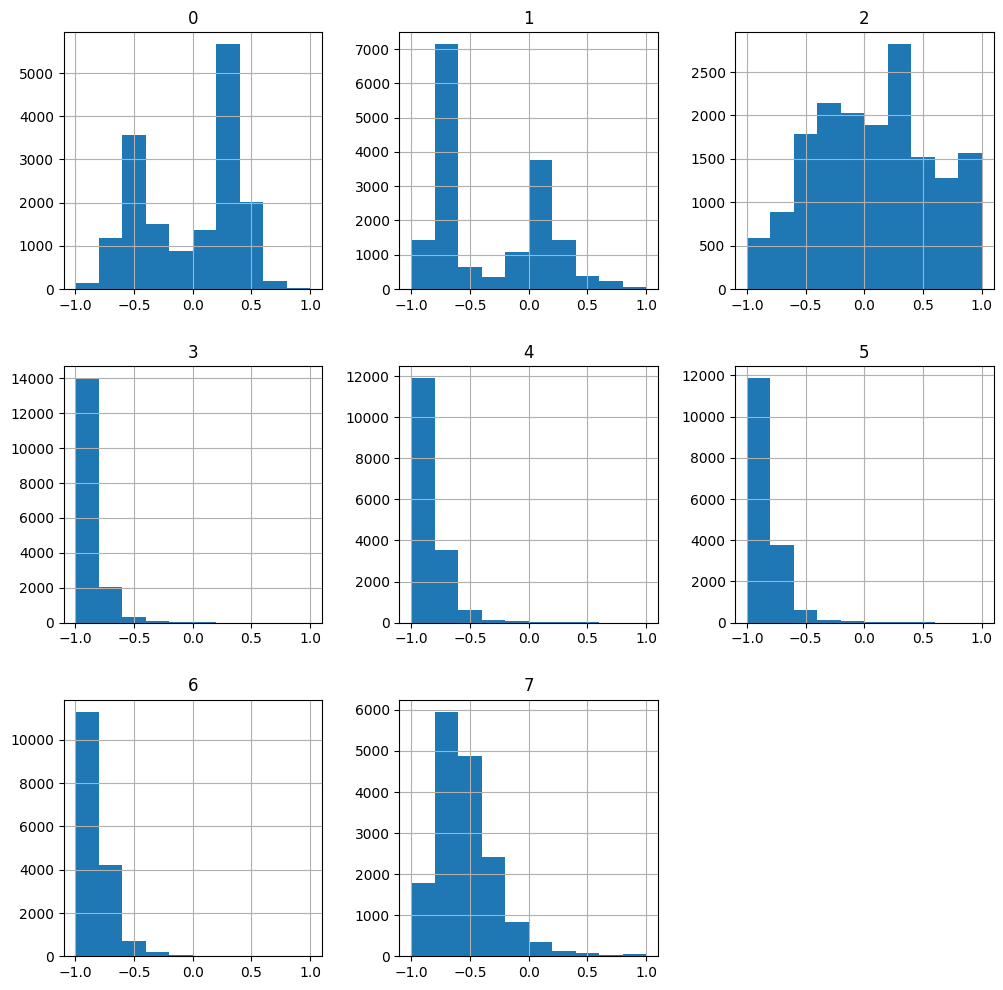

In [66]:
pd.DataFrame(housing_num_min_max_scaled).hist(figsize=(12, 12))

array([[<AxesSubplot: title={'center': '0'}>,
        <AxesSubplot: title={'center': '1'}>,
        <AxesSubplot: title={'center': '2'}>],
       [<AxesSubplot: title={'center': '3'}>,
        <AxesSubplot: title={'center': '4'}>,
        <AxesSubplot: title={'center': '5'}>],
       [<AxesSubplot: title={'center': '6'}>,
        <AxesSubplot: title={'center': '7'}>, <AxesSubplot: >]],
      dtype=object)

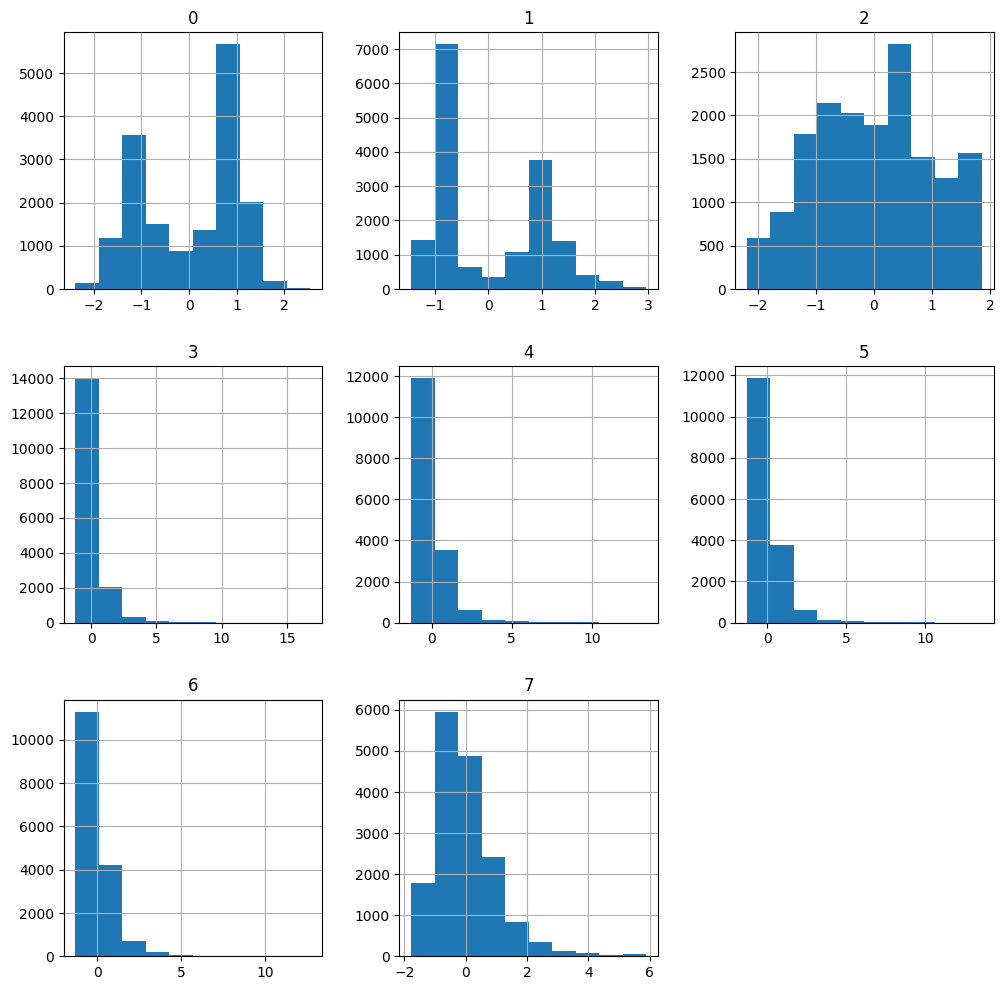

In [67]:
pd.DataFrame(housing_num_std_scaled).hist(figsize=(12, 12))

Text(0, 0.5, 'Number of districts')

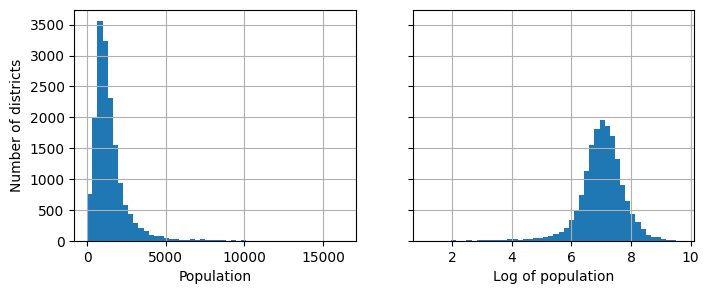

In [68]:
# log transforms
fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
housing["population"].hist(ax=axs[0], bins=50)
housing["population"].apply(np.log).hist(ax=axs[1], bins=50)
axs[0].set_xlabel("Population")
axs[1].set_xlabel("Log of population")
axs[0].set_ylabel("Number of districts")

# Model Training and Selection

In [89]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)



LinearRegression()

In [91]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data) # transform test data based on train parameters

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [276608.27419651 333603.0303772  118237.5726011  108255.75159886
 308943.82732346]


In [93]:
from sklearn.metrics import mean_squared_error

# evaluate
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse


67769.12117461127

In [95]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae # underfitting, or not enough features

49190.6005273782

In [96]:
# try more powerful model to avoid underfitting


from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(random_state=42)

In [97]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse # overfitting

0.0

In [102]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10) # utility function instead of cost function
tree_rmse_scores = np.sqrt(-scores)

In [103]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [68179.7164381  67258.55627212 66747.10876197 72757.66827765
 69428.86115501 69925.32535691 72349.29057653 73190.09810575
 70307.13891453 70553.57614878]
Mean: 70069.73400073592
Standard deviation: 2130.605601030783


In [104]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(n_estimators=10, random_state=42)

In [106]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

22125.967272807102

In [108]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores) # score of training set still much lower than validation set -> overfitting

Scores: [51433.95401596 52229.53617278 50394.82167844 53085.45598121
 51020.54135028 53405.94390136 52281.09088111 53206.74515362
 52332.97616423 51207.24987424]
Mean: 52059.83151732392
Standard deviation: 964.5049649698855


## Hyperparameter Tuning

In [109]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [110]:
grid_search.best_params_ # retry grid search as maximal values for hyperparams were used

{'max_features': 6, 'n_estimators': 30}

In [113]:
pd.DataFrame(grid_search.cv_results_).sort_values(by="rank_test_score", ascending=True).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
8,1.447656,0.006271,0.032165,0.001165,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.508980e+09,-2.284928e+09,...,-2.449227e+09,8.319218e+07,1,-3.811516e+08,-3.736656e+08,-3.828253e+08,-3.692066e+08,-3.790399e+08,-3.771778e+08,5.040410e+06
11,2.229859,0.621640,0.036765,0.006394,8,30,NaN,"{'max_features': 8, 'n_estimators': 30}",-2.497708e+09,-2.395135e+09,...,-2.462387e+09,6.205534e+07,2,-3.804436e+08,-3.836161e+08,-3.713159e+08,-3.719126e+08,-3.771951e+08,-3.768967e+08,4.770864e+06
5,1.087426,0.006449,0.031673,0.000861,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.450701e+09,-2.393976e+09,...,-2.476153e+09,5.451763e+07,3,-3.841492e+08,-3.845209e+08,-3.920878e+08,-3.831359e+08,-3.852893e+08,-3.858366e+08,3.201547e+06
17,0.671400,0.041149,0.016780,0.004620,4,10,False,"{'bootstrap': False, 'max_features': 4, 'n_est...",-2.558146e+09,-2.514960e+09,...,-2.611740e+09,9.230768e+07,4,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00
7,0.479656,0.003714,0.010987,0.000630,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.714014e+09,-2.362076e+09,...,-2.629784e+09,1.354326e+08,5,-4.971267e+08,-4.657065e+08,-4.839598e+08,-4.813864e+08,-4.873265e+08,-4.831012e+08,1.020609e+07


In [115]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.12728791e-02, 6.54321372e-02, 4.32129653e-02, 1.81524411e-02,
       1.64740195e-02, 1.75839475e-02, 1.62698618e-02, 3.25874013e-01,
       4.77885564e-02, 1.13429502e-01, 9.52943597e-02, 8.01398025e-03,
       1.54410499e-01, 9.13375828e-05, 2.33100242e-03, 4.36849765e-03])

Text(0.5, 0, 'Relative Importance')

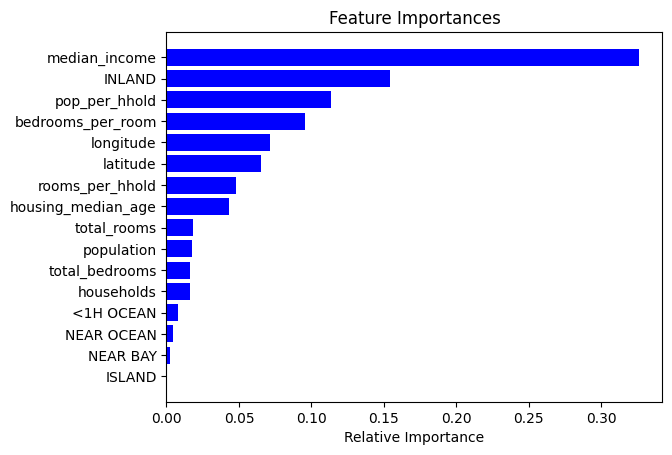

In [122]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
#cat_encoder = cat_pipeline.named_steps["cat_encoder"] # old solution
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)


indices = np.argsort(feature_importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), feature_importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [attributes[i] for i in indices])
plt.xlabel('Relative Importance')

In [124]:
# evaluate
final_model = grid_search.best_estimator_

X_test = strat_test.drop("median_house_value", axis=1)
y_test = strat_test["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)



In [125]:
final_rmse

50522.23283351011

In [126]:
# 95% confidence interval



from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
mean = squared_errors.mean()
m = len(squared_errors)

np.sqrt(stats.t.interval(confidence, m - 1,
                         loc=np.mean(squared_errors),
                         scale=stats.sem(squared_errors)))

array([48193.05629829, 52748.6620266 ])